# Exercise 3 - Discrete Fourier Analysis and Synthesis of Signals (60 mins)

## Objectives
- To learn that any periodic signal can be constructed using a linear combination of sinusoidal waves
- To introduce the Discrete Fourier Transform (DFT)
- To understand the difference between amplitude and phase in the frequency-domain 

## Video ([Backup Link](https://www.youtube.com/watch?v=e4FE4L4QhQM))

In [1]:
# Embed Youtube video
from IPython.display import HTML 
HTML('''<script> code_show=true;function code_toggle() {if (code_show){$('.cm-comment:contains(@hidden)').closest('div.input').hide();} else {$('.cm-comment:contains(@hidden)').closest('div.input').show();}code_show = !code_show} $( document ).ready(code_toggle);</script><center><iframe width="560" height="315" src="https://www.youtube.com/embed/e4FE4L4QhQM?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe></center>''') # @hidden

## Lab Exercise

### Sinusoidal Signals
We have seen how Python can manipulate data stored as a $1\times128$ vector. Now let us create a matrix `S` containing 10 rows of sine waves such that the first row is frequency $f$, the second row is the second harmonic $2f$ and so on. In this case, `Nsamp` = 128, `fsig` = 1000 and `fsamp` = 25600.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from functions.lab_functions import sinegen

fs = 8000
fsig = 150
Nsamp = 100


S = []
T = []
for i in np.arange(0, 10):
    t, x = sinegen(fs, (i+1)*fsig, Nsamp)
    S.append(x)
    T.append(t)
    


Next, let us explore what happens when we add all the harmonics together. This can be done by first creating a row vector `p` containing 'ones', and then multiplying this with the matrix `S`:

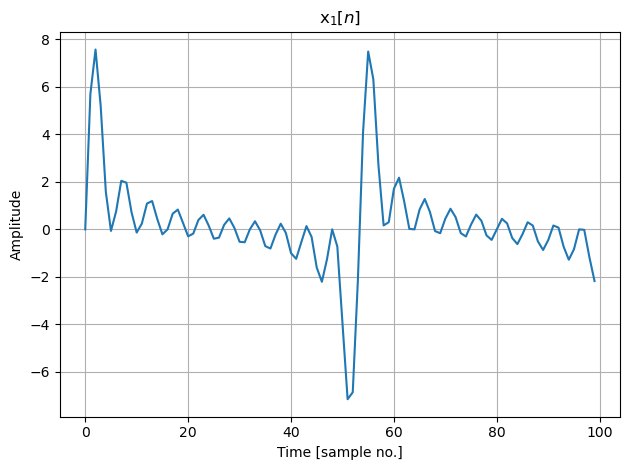

In [3]:
from functions.lab_functions import plot_signal

p = np.ones(10)
x1 = p.dot(S)

plt = plot_signal(x1, title='x$_1[n]$', xlabel='Time [sample no.]', ylabel='Amplitude')
plt.show()

>**GTA Tip**:
>
>The `np.dot(a, b)` command performs the dot product of two arrays. 

This is equivalent to calculating:
$$x_1[n]=\sum_{k=1}^{10}\sin(k \Omega n),$$

where $\Omega=2\pi\frac{f}{f_s}$ is the normalised angular fundamental frequency and $n=\{0,\:1,\:2,\cdots,\:\text{Nsamp}-1\}$.


**Question 3.1**: Explain the result $x_1[n]$.

All the sine waves will intersect with the fundamental frequency, $ sin(\frac{2\pi fn}{f_s}) = sin(\frac{3\pi n}{80}) $ . The end of the first cycle would be at $ 2 \pi =\frac{3\pi n}{80} \Rightarrow n = 160/3 = 53.333... $



Instead of using a unity row vector, we could choose a different weight $b[k]$ for each harmonic component in the summation:
$$x_2[n]=\sum_{k=1}^{10}b[k]\sin(k \Omega n).$$

Try $b[k] = \{1,\: 0,\: 1/3,\: 0,\: 1/5,\: 0,\: 1/7,\: 0,\: 1/9,\: 0\}$ and observe what we get.

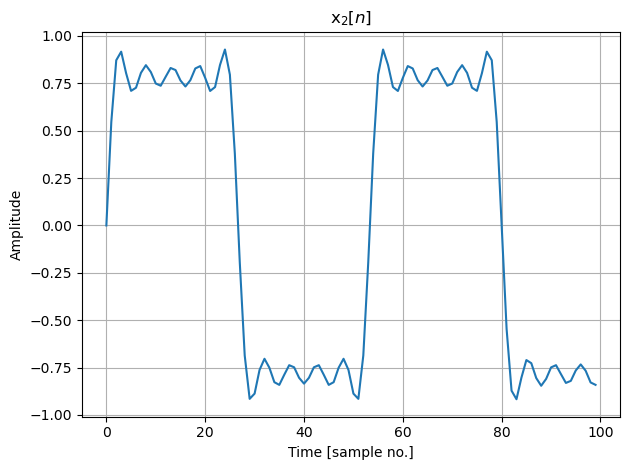

In [4]:
bk = np.array([1,0,1/3,0,1/5,0,1/7,0,1/9,0])
x2 = bk.dot(S)

plt = plot_signal(x2, title='x$_2[n]$', xlabel='Time [sample no.]', ylabel='Amplitude')
plt.show()

Let us see what we get for $x_2[n]$ with $b[k] = \{1,\: -1/2,\: 1/3,\: -1/4,\: 1/5,\: -1/6,\: 1/7,\: -1/8,\: 1/9, \:0\}$.

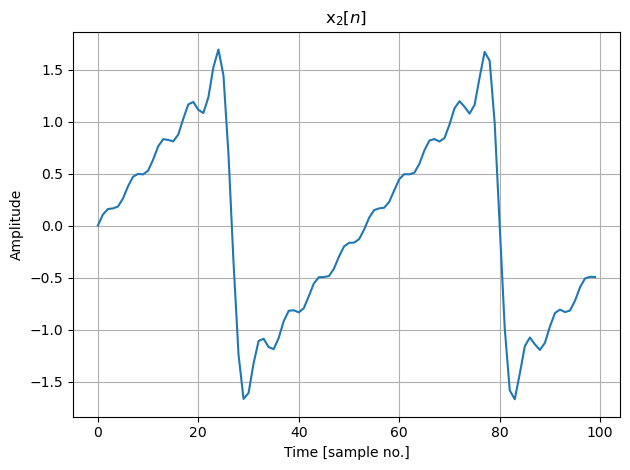

In [5]:
bk = np.array([1,-1/2,1/3,-1/4,1/5,-1/6,1/7,-1/8,1/9,0])
x2 = bk.dot(S)

plt = plot_signal(x2, title='x$_2[n]$', xlabel='Time [sample no.]', ylabel='Amplitude')
plt.show()

**Question 3.2 (Optional)**: You may want to derive the results for $x_2[n]$ with $b[k] = \{1,\: -1/2,\: 1/3,\: -1/4,\: 1/5,\: -1/6,\: 1/7,\: -1/8,\: 1/9, \:0\}$ from first principles.

**Answer**:
We are trying to plot a sawtooth wave with amplitude $ \pi /2$ and a period of $320/3 $ calculated from $ \frac{f}{f_s} $.

Using the fourier series general formula:

$$ f(x) = \frac{1}{2}a_0 + \sum_{n=1}^{\infty} a_n\cos(nx) + \sum_{n=1}^{\infty} b_n\sin(nx) \\ \ \\ 
\text{where} \\

a_0 = \frac{2}{T} \int_{-T/2}^{T/2} f(x) \,dx = 0 \text{( since odd function)} \\ \ \\  
a_n = \frac{2}{T} \int_{-T/2}^{T/2} f(x)\cos(\frac{2n\pi x}{T}) \,dx \\ \ \\
b_n = \frac{2}{T} \int_{-T/2}^{T/2} f(x)\sin(\frac{2n\pi x}{T}) \,dx \\ \ \\
$$ 

$ \text{We consider only } b_n \text{ terms due to odd extension. } $ $\text{The integral for } a_n \text{ is an even function and integrates to a value of zero.}  $

$$ 
b_n = \frac{2}{T} \int_{-T/2}^{T/2} \frac{x \cdot \pi / 2}{T/2}\sin(\frac{2n\pi x}{T}) \,dx \\ \ \\
= -\frac{(-1)^n}{n}

$$


So far, we have used sine waves as basis functions. Let us now try using cosine signals. First, create a `cosgen` function and use it to generate a $10\times 128$ matrix `C` with 10 harmonically-related cosine waveforms. 

The `cosgen` function (like the `singen` function) is provided in the `lab_functions.py` file and is:

```python
def cosgen(fs, fsig, Nsamp):
    tsamp = 1/fs
    t = np.arange(0, Nsamp*tsamp, tsamp)
    y = np.cos(2*np.pi*fsig*t)
    return t, y
```

We can import it using:

```python
from functions.lab_functions import cosgen
```

And we can run it in the following way:

```python
y = cosgen(fs, fsig, Nsamp)
```

Now, use the weight vector $a[k] = \{1,\: 0,\: -1/3,\: 0,\: 1/5,\: 0,\:  -1/7,\: 0,\: 1/9,\: 0\}$, to compute `x3=ak*C` and plot the result of:
$$x_3[n]=\sum_{k=1}^{10}a[k]\cos(k \Omega n).$$

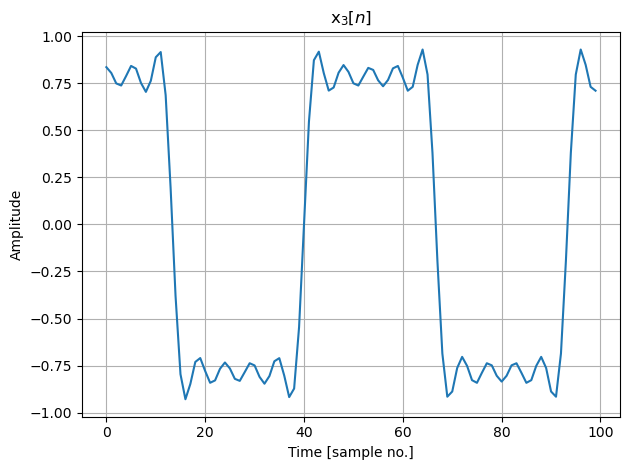

In [6]:
from functions.lab_functions import cosgen

C = []
for i in np.arange(0,10):
    t, x = cosgen(fs, (i+1)*fsig, Nsamp)
    C.append(x)
    
ak = np.array([1,0,-1/3,0,1/5,0,-1/7,0,1/9,0])
x3 = ak.dot(C)

plt = plot_signal(x3, title='x$_3[n]$', xlabel='Time [sample no.]', ylabel='Amplitude')
plt.show()

**Question 3.3**: How does $x_3[n]$ differ from $x_2[n]$ obtained earlier using sine waves? What general conclusions on the even and odd symmetry of the signal can you draw?
**Answer**: Sine waves draw odd signals, cos waves draw even signals.

**Question 3.4 (Optional)**:  Prove that $x[n]=a[0] + \sum^{\infty}_{k=1}a[k]\cos(\frac{2\pi}{N}kn) + \sum^{\infty}_{k=1}b[k]\sin(\frac{2\pi}{N}kn)$ is equivalent to $x[n]=\sum^{\infty}_{k=-\infty}A[k]e^{j\frac{2\pi}{N}kn}$. How can the coefficients $A[k]$ be determined? 


**Answer**: 

Taken from Math 1B notes page 11:

<!-- <img src="img/cmplxfourier.png"  width="900" style = "background-color:white" /> -->

$$
f(x)e^{-imx} = \left( \sum^{\infty}_{n=-\infty} c_n e^{-inx}\right)e^{-imx} \\
= \sum^{\infty}_{n=-\infty} c_n e^{-i(n-m)x} \\
$$

$$
\Rightarrow \int_{-\pi}^{\pi} f(x)e^{-imx} dx = \int_{-\pi}^{\pi} \sum^{\infty}_{n=-\infty} c_n e^{-i(n-m)x} dx \\
$$

$$
= \sum^{\infty}_{n=-\infty} c_n \int_{-\pi}^{\pi} e^{-i(n-m)x} dx \\
$$

Let $n-m = k \neq 0$. Then each integral in the series is straightfoward:

$$
\int_{-\pi}^{\pi} e^{-ikx} dx =\frac{1}{ik}(e^{ik\pi} - e^{-ik\pi}) = \frac{2}{k}\sin(k\pi) = 0
$$

So every integral in the sum vanishes, except for the case of $n=m \Rightarrow k =0$, in which case we have

$$
\int_{-\pi}^{\pi} e^{i(0)x} dx = \int_{-\pi}^{\pi} 1 dx = 2\pi
$$

So every integral in the infinite sum is zero except for the one case of $n=m$, in which case the integral is $2\pi$, multiplying the coefficient $c_m$. Hence we have shown that

$$
\int_{-\pi}^{\pi} f(x)e^{-imx} dx = 2\pi c_m
$$

for every integer $m$. Let us rewrite to the subscript of n:

$$
c_n = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x)e^{-inx} dx
$$

for every integer $n$. This is the Fourier series for a periodic function $f(x)$.


>**GTA Tip**
>
>Recall that $\sin(\theta) = -\frac{1}{2}je^{j\theta} + \frac{1}{2}je^{-j\theta}$ and $\cos(\theta) = \frac{1}{2}e^{j\theta}+ \frac{1}{2}e^{-j\theta}$.

We observe a really important property of periodic signals using Fourier series analysis. Fourier series analysis states that any periodic function can be constructed using a weighted sum of harmonically-related sinusoids. This leads to the definition of the Discrete Fourier Series (DFS) for periodic signals:

---
**DFS (Discrete Fourier Series)**:
$$\text{Forward Transform: }X[k]=\sum^{N-1}_{n=0}x[n]e^{-j \frac{2\pi}{N} kn}, \quad k = 0,\pm1,\pm2,\cdots$$
$$\text{ Inverse Transform: }x[n]= \frac{1}{N}\sum^{N-1}_{k=0} X[k]e^{j \frac{2\pi}{N} kn} , \quad n = 0,\pm1,\pm2,\cdots$$

---

You should now be able to see that it is possible to construct $x[n]$ from a finite number of harmonics; the frequencies are $\Omega=\frac{2\pi}{N}k,$ where $k = 0, 1,\cdots,N-1$.


**Question 3.5**:  Derive the DFS of the periodic sequence  $x[n] = \{\cdots, \stackrel{\text{n=0}}{0}, \stackrel{}{1}, \stackrel{}{2}, \stackrel{}{3}, \stackrel{}{0}, \stackrel{}{1}, \stackrel{}{2}, \stackrel{}{3}, \stackrel{}{0}, \stackrel{}{1}, \stackrel{}{2}, \stackrel{}{3},\cdots\}$, where $N=4$ and the '$n=0$' denotes the $0^{\text{th}}$ sample. What do you notice about the periodicity of $X[k]$? 

**Answer**:
$$
\text{Manually substituting in all the values:} \\ 
$$
$$
X[k] = 0\cdot e^{-j\frac{2\pi}{4}k \cdot 0}+1\cdot e^{-j\frac{2\pi}{4}k}+ 2\cdot e^{-j\frac{2\pi}{4}2k}+ 3\cdot e^{-j\frac{2\pi}{4}3k} \\
$$
$$
= i\sin(2\pi\frac{-k}{4})  + 2i\sin(2\pi\frac{-2k}{4}) + 3i\sin(2\pi\frac{-3k}{4})
$$


Fundamental frequency is $\frac{1}{N}$ so that period would be $N = 4 \text{ samples}$


It should be evident that $X[k]$ is itself a (complex-valued) periodic sequence with a fundamental period equal to $N$, that is,

$$X[k+N]=X[k],$$

where $k$ is the harmonic or frequency bin index and $n$ is the sample index.

Recall that to perform the frequency analysis of a periodic signal, we take one cycle and perform the DFS. So what about non-periodic signals? If an infinitely long continuous-time domain signal is sampled, the frequency-domain representation is given by what is called the Discrete-Time Fourier Transform (DTFT). This is defined as $X(e^{j\Omega})=\sum\limits_{n=-\infty}^{\infty}x[n]e^{-j\Omega n}$ and gives a continuous frequency-domain representation. 

However, it is not possible in practice to process an infinite number of samples. Therefore, we only take and analyse the frequency contents of a finite number of samples $N$ in practice. This leads to the Discrete Fourier Transform (DFT). The DFT is related to the DTFT via frequency-domain sampling at discrete frequencies $2\pi k/N$, $k = 0,1,\cdots N-1$ of the DTFT spectrum $X(e^{j\Omega})$, where $\Omega$ is the frequency-domain variable.

The equations for the Discrete Fourier Series (DFS) and the Discrete Fourier Transform (DFT) are surprisingly the same but the reasoning behind the periodicity is not. In the DFS, the time sequence is 'naturally' periodic whereas the periodicity of the DFT is enforced by frequency-domain sampling of $X(e^{j\Omega})$ (<em>recall Exercise 2 and the effects of sampling</em>). The full mathematical definition of the DFT is:

---
**DFT (Discrete Fourier Transform)**: $x[n] \rightarrow X[k]$
$$\text{Forward Transform: }X[k]=\sum^{N-1}_{n=0}x[n]e^{-j \frac{2\pi}{N} kn}, \quad k = 0, 1, 2,\cdots N-1 $$
$$\text{ Inverse Transform: }x[n]= \frac{1}{N}\sum^{N-1}_{k=0} X[k]e^{j \frac{2\pi}{N} kn} , \quad n = 0, 1, 2,\cdots N-1 $$

---

**Question 3.6**: Can the Fourier transform modify the energy of a signal?

**Answer**: No, once normalised.

The energy of a discrete signal is equal to (under a  $1 \Omega$ load):

$$
E = \sum_{n=-\infty}^{\infty} x^2[n]
$$

Compare to:
$$


E_{\text{transformed}} = \sum_{k=-\infty}^{\infty} X^2[k]
 = \sum_{n=-\infty}^{\infty} \left( \sum^{N-1}_{k=0}x[n]e^{-j \frac{2\pi}{N} kn} \right)^2 \\ \ \\ \ \\ 
$$


We can consider just the magnitude as $ |e^{ia}| = 1$ for all real $a$. So $(e^{ia})^2 = |e^{ia}|^2 = 1$

We evaluate:
$$
X[k]^2 = \left| \sum^{N-1}_{n=0}x[n]e^{-j \frac{2\pi}{N} kn} \right|^2 = \sum^{N-1}_{n=0}x[n]^2 = N(x[n]^2) \\ \ \\
E_{\text{transformed}} = \sum_{n=-\infty}^{\infty} X^2[k]
 = N\sum_{k=-\infty}^{\infty}x[n]^2  \\ \ \\ \ \\  

$$

If you normalise by dividing by N, then the energy of the signal is unchanged. 

We have just derived Parseval's relation:
$\sum_{n=-\infty}^{\infty} |x[n]|^2 = \frac{1}{N}\sum_{k=-\infty}^{\infty}|X[k]|^2$


**Question 3.7**: When applying Fourier analysis to a signal, under which circumstances should a DFS be employed and under which circumstances should a DFT be employed?

**Answer:** The discrete Fourier series (DFS) is used to represent periodic time functions and the DFT is used to represent finite-duration time functions.

> In Python we use the `fft` function to calculate the DFT. The Fast Fourier Transform (FFT) is just a fast algorithm that is used to calculate the DFT. 

Now let us find the DFT spectrum of the sine wave produced by running the following code:

In [7]:
from scipy.fft import fft
#fs, fsig, nsamp
t, x_sin = sinegen(8000,1000,8)
A = fft(x_sin)

Let us plot the results:

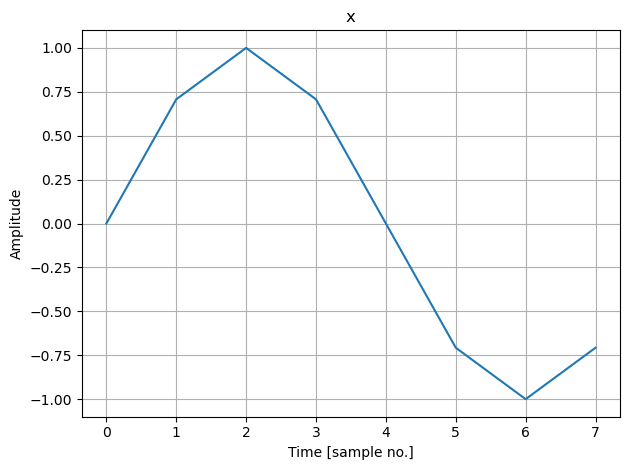

A: 
-0j,(-0-4j),-0j,0j,-0j,-0j,0j,(-0+4j),

In [8]:
plt = plot_signal(x_sin, title='x', xlabel='Time [sample no.]', ylabel='Amplitude')
plt.show()

print('A: ')
for i in A:
    print(np.round(i,1), end = ',')

**Question 3.8**: Explain the numerical result in `A`. Make sure that you know the significance of each number in the output. Evaluate the DFT of a cosine signal. Is it what you would expect?

**Answer**: The frequency of the sinusoid signal and the sampling signal will cause peaks at their respective frequencies. With 1000Hz and 8000Hz respecitvely, we expect peaks at entries 1 and 8.

**Question 3.9**: What is the frequency resolution, $\Delta F$, of a 256-point DFT when the sampling frequency is 1000 Hz?

**Answer**:
Last sample of DFT: 
$X[k] = \sum_{n=0}^{255} x[n]e^{-j\frac{2\pi n}{N}\cdot 255k }$

Last term is:
$x[n]e^{-j\frac{2\pi}{256}\cdot 255}$

So the frequency is 255/256 $= f_s - \Delta F$

$\Delta F = 1000-255/256 \approx 999.004 $

>**GTA Tip**
>
>- The first sample of the DFT represents the DC component (0 Hz). 
>- The last sample  of the DFT represents the sampling frequency minus the frequency resolution ($f_s - \Delta F$).


Instead of working with real and imaginary numbers of a complex number $A=b+jc$, where $b,c$ are real scalars and $j=\sqrt{-1}$, it is often more convenient to work with the magnitude and phase of the frequency components, as defined by:

>Magnitude, $|A|=\sqrt{b^2+c^2}$ and phase, $\angle{A}=\tan^{-1}\frac{c}{b}$.

We also define a `plot_spec(A)` function which plots the magnitude and phase spectra of `A`.

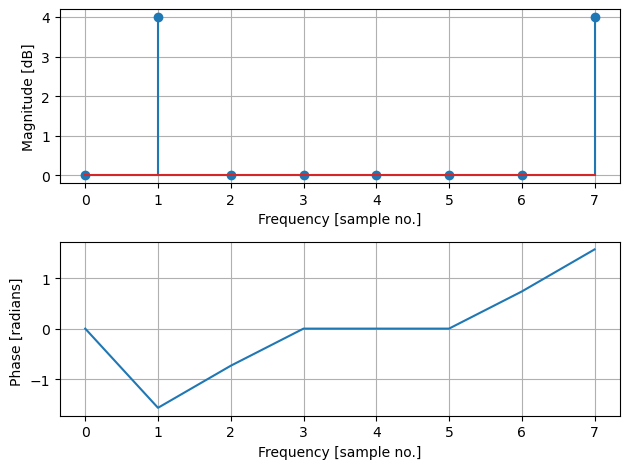

In [9]:
from functions.lab_functions import plot_spec

plt = plot_spec(A, func='stem')
plt.show()

### Dirac Delta and Rectangular Signals

Now, create a pulse signal with 8 samples of ones and 8 samples of zeros. Obtain its magnitude spectrum and verify that it is what you expect. 

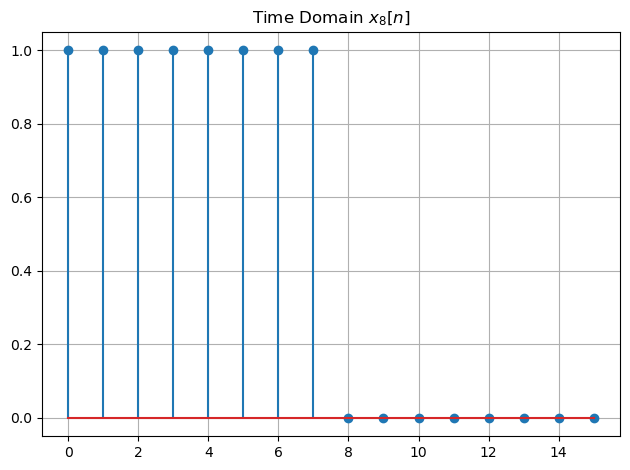

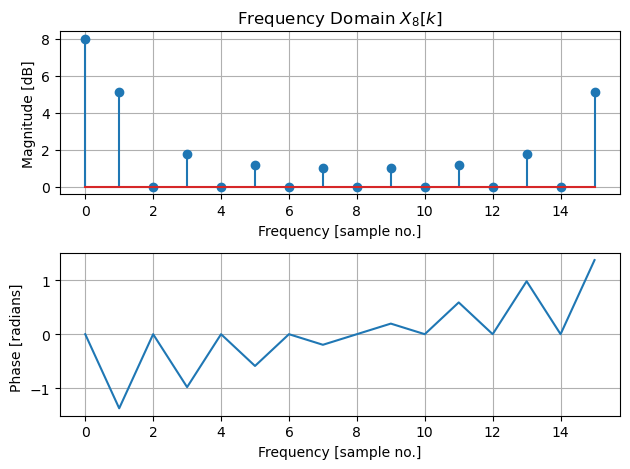

In [10]:
pulse_of_ones = np.ones(8) # Gradually reduce the width of the pulse until it becomes a unit impulse function
following_zeros = np.zeros(8)

x8 = np.concatenate((pulse_of_ones, following_zeros))
plt = plot_signal(x8, title='Time Domain $x_8[n]$', func='stem')
plt.show()

X8 = fft(x8);
plt = plot_spec(X8, title='Frequency Domain $X_8[k]$', func='stem')
plt.show()

Gradually reduce the width of the pulse until it becomes a unit impulse function, i.e. contains only a single one and 15 zeros. Observe the changes in the spectrum and make sure you can explain. 

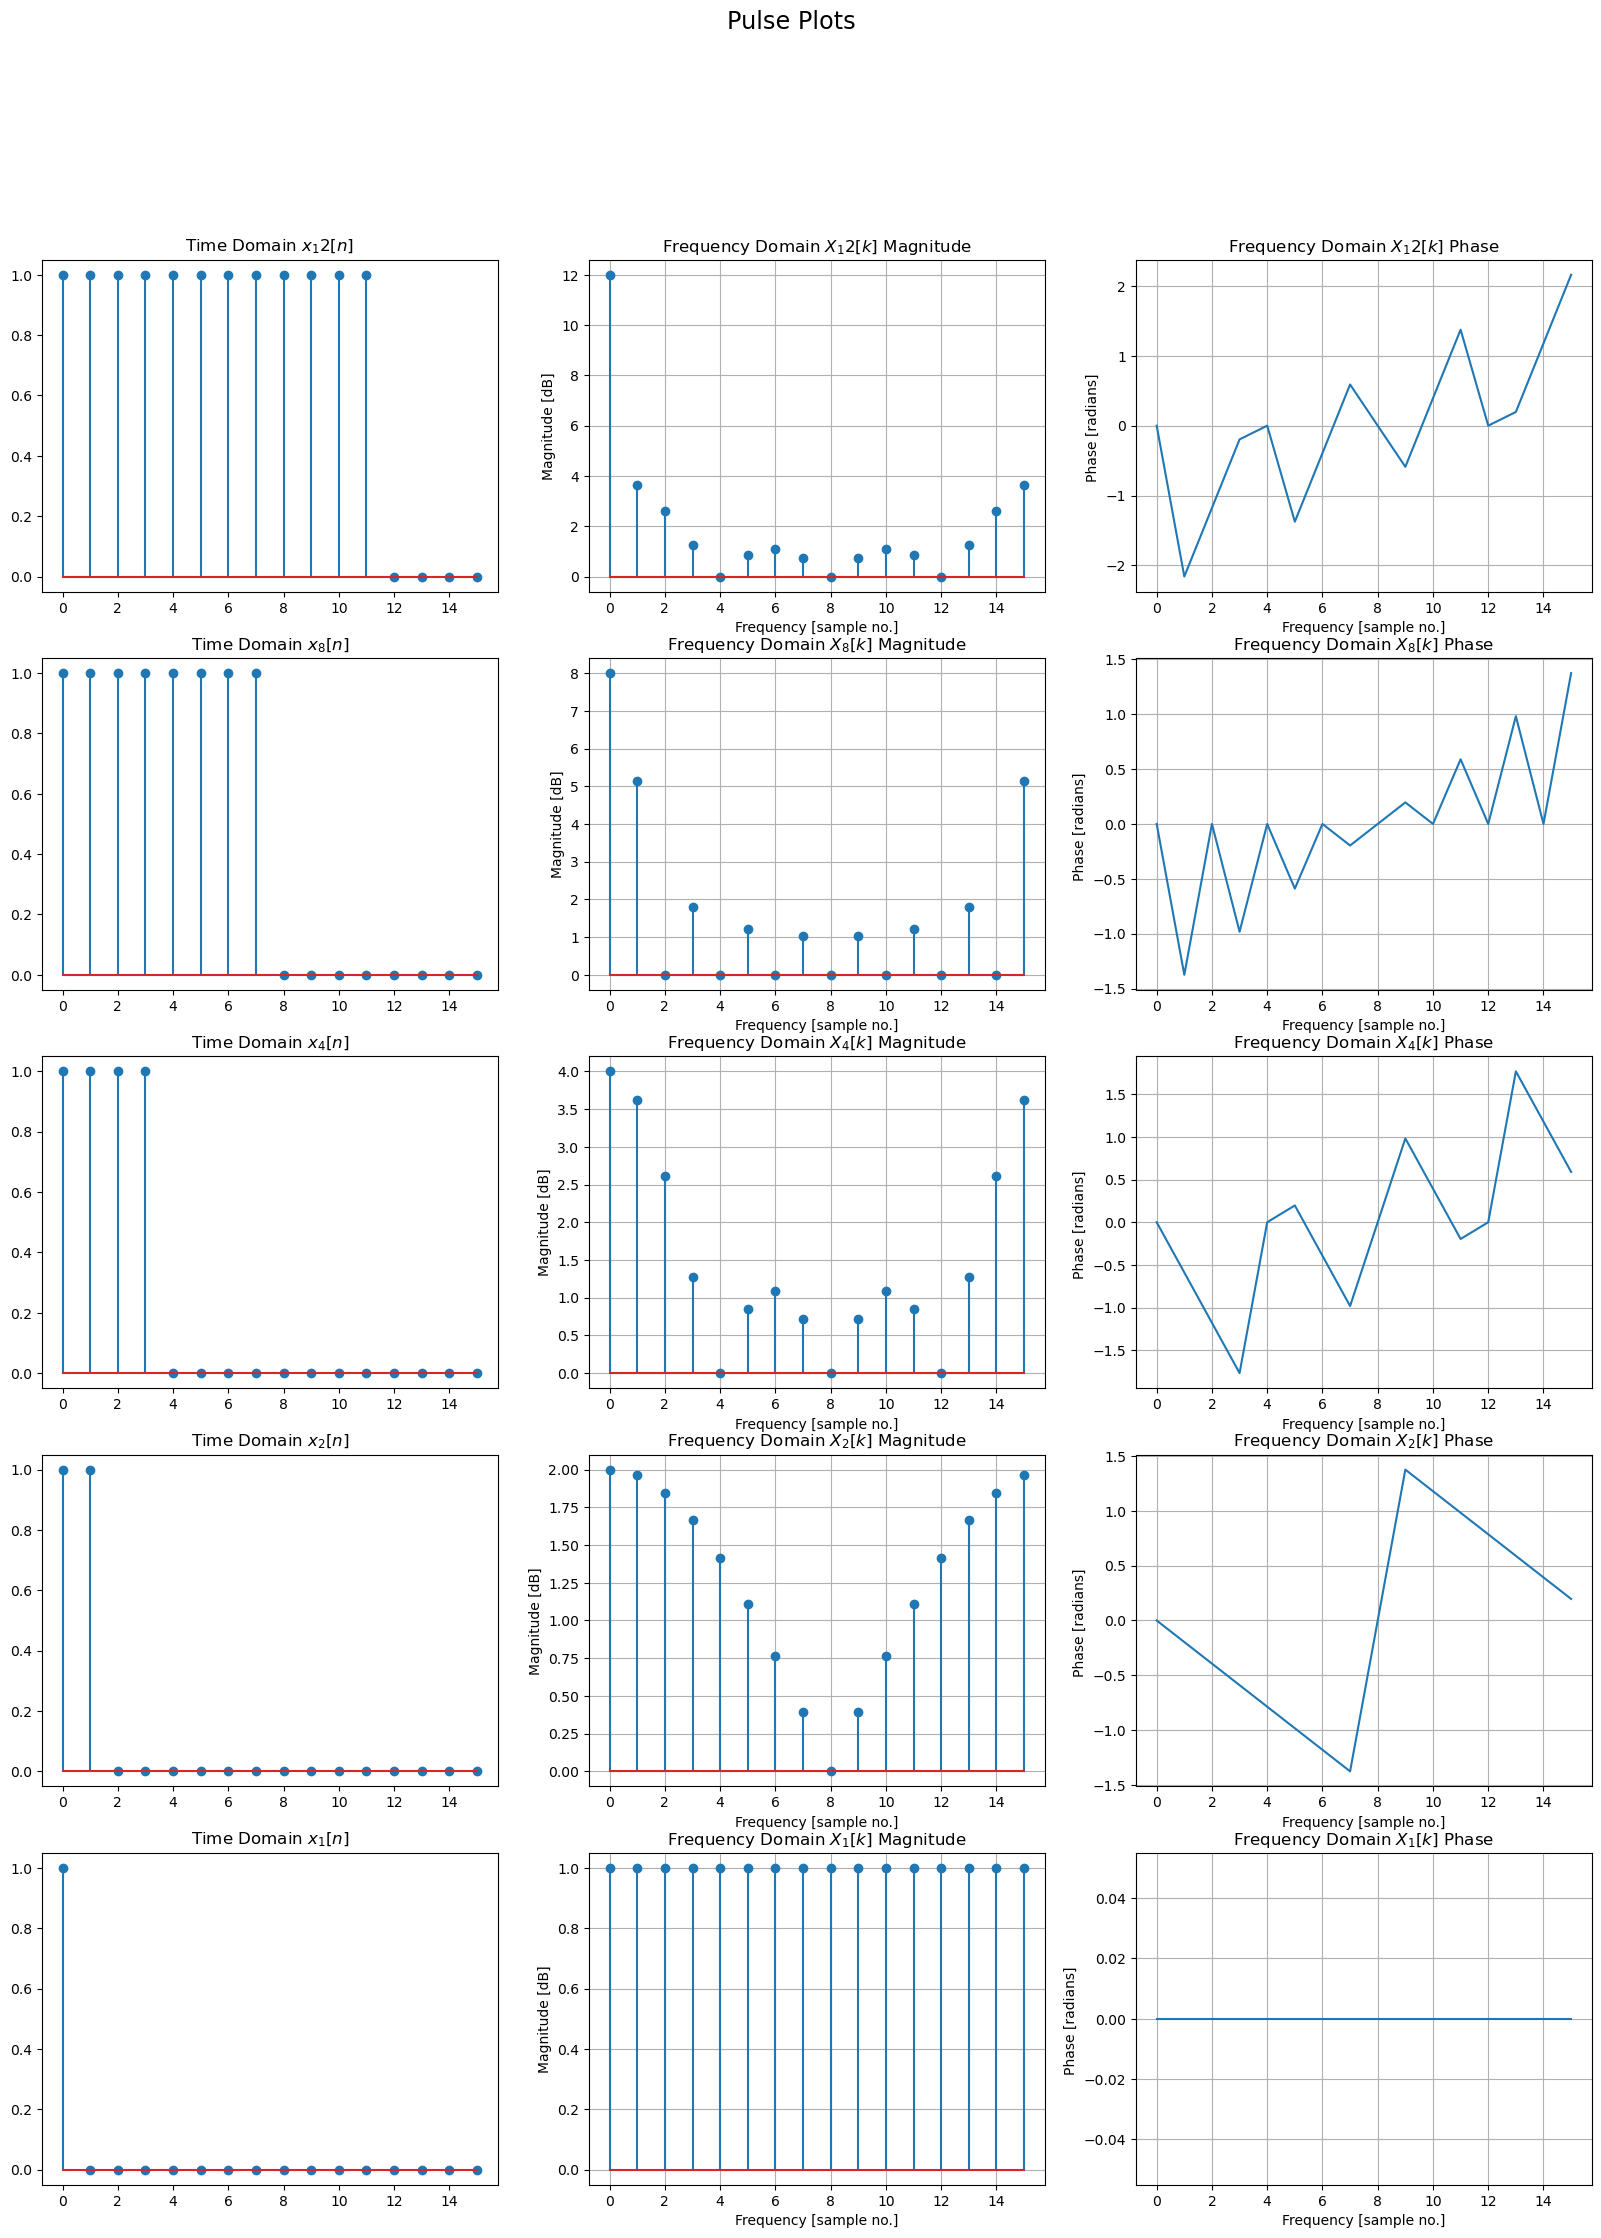

In [11]:

arr = [12,8,4,2,1]
rows = len(arr)
cols = 3
total_length = 16
fig, axs = plt.subplots(len(arr), 3, figsize=(20, 25))
fig.suptitle('Pulse Plots', fontsize='xx-large')
for i, freq in enumerate(arr):
    i*=3
    timeD = np.concatenate((np.ones(freq), np.zeros(total_length-freq)))
    freqD = fft(timeD)
    
    x = timeD
    title = f'Time Domain $x_{freq}[n]$'
    axs[i//cols, 0].stem(x)
    axs[i//cols, 0].set(title=title)
    
    
    x = freqD
    title=f'Frequency Domain $X_{freq}[k]$'
    mag = np.real(np.sqrt(x * np.conj(x)))
    phase = np.arctan2(np.imag(x), np.real(x))
    phase = np.unwrap(phase)
    
    mag_ylabel = 'Magnitude [dB]'
    xlabel='Frequency [Hz]'
    
    xlabel='Frequency [sample no.]'
    axs[i//cols, 1].stem(mag)
    axs[i//cols, 2].plot(phase)
    
    axs[i//cols, 1].set(xlabel=xlabel, ylabel=mag_ylabel, title=title+" Magnitude")
    axs[i//cols, 2].set(xlabel=xlabel, ylabel='Phase [radians] ', title=title+" Phase")
    axs[i//cols, 1].grid()
    axs[i//cols, 2].grid()



plt.show()


**Question 3.10**: What do these plots tell us about the frequency components that make up a unit impulse function?

**Answer**: In the frequency domain, the Dirac delta function has a constant value of 1 at all frequencies. This means that it contains all frequency components equally, from DC (zero frequency) to infinity. 

Next, delay this unit impulse function by 1 sample and find its spectrum again. Examine the real and imaginary spectra. 

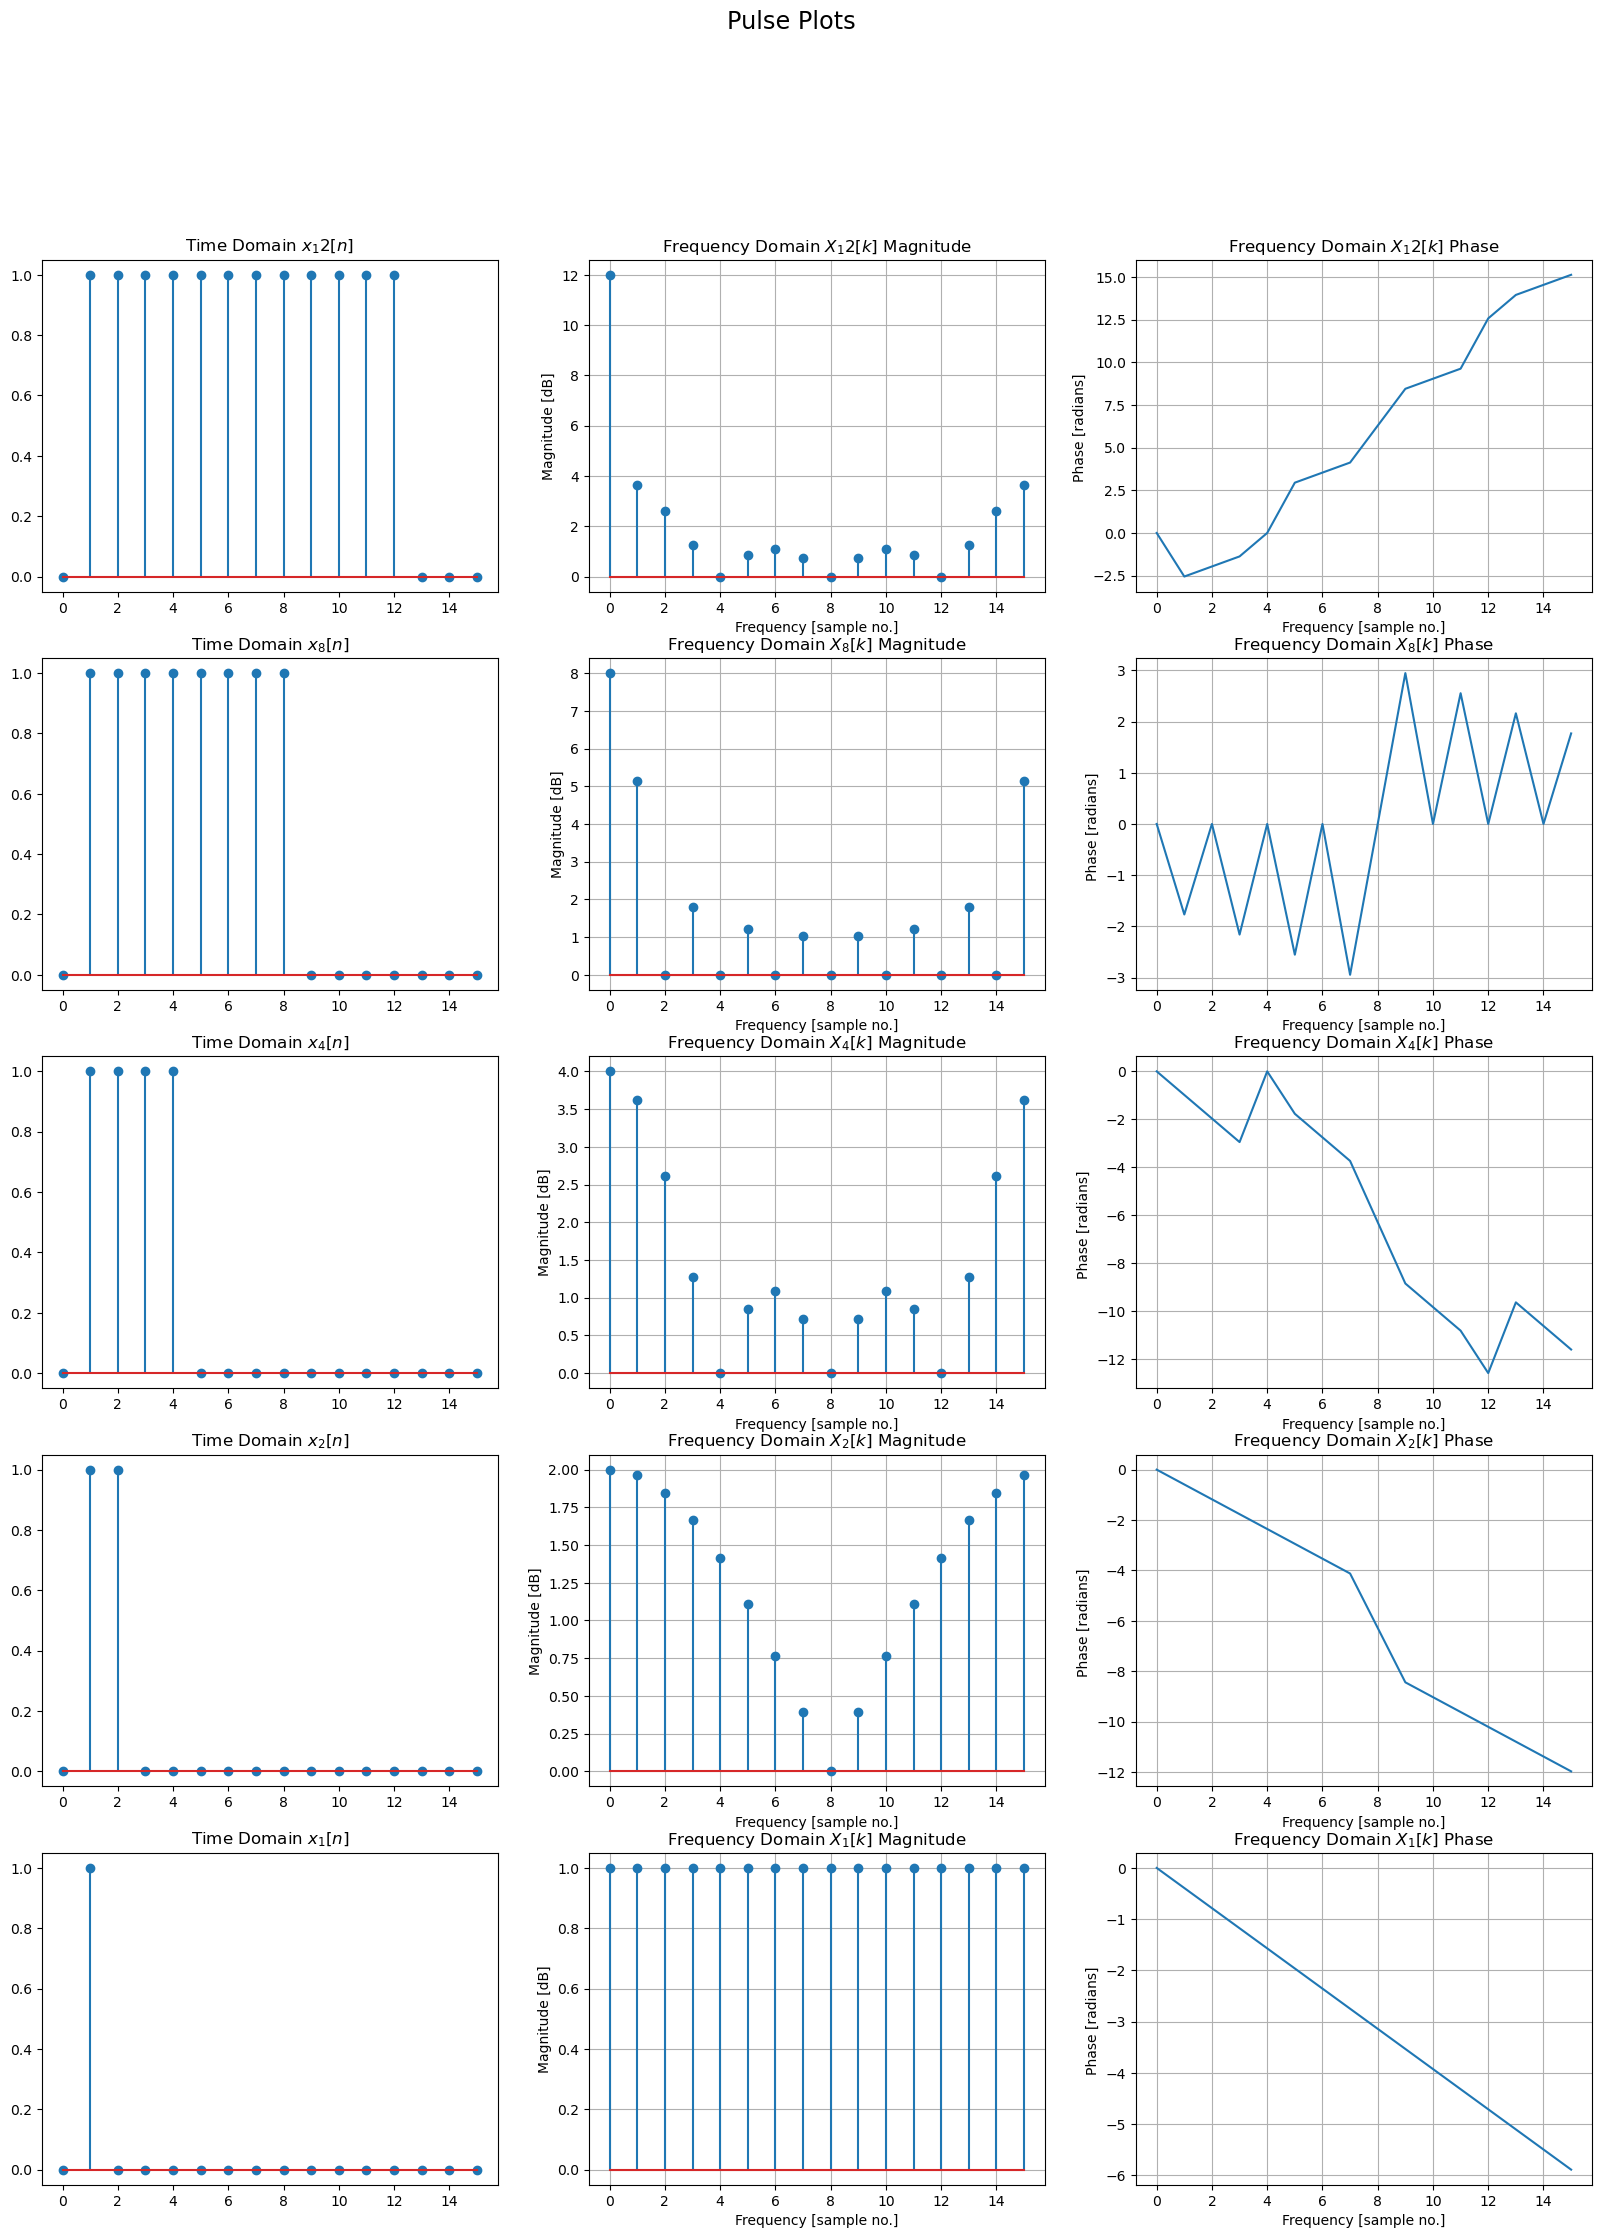

In [12]:
# Write the code here 
arr = [12, 8, 4, 2, 1]
rows = len(arr)
cols = 3

total_length = 15
fig, axs = plt.subplots(len(arr), 3, figsize=(20, 25))
fig.suptitle('Pulse Plots', fontsize='xx-large')
for i, freq in enumerate(arr):
    i *= 3
    timeD = np.concatenate((np.zeros(1), np.ones(freq), np.zeros(total_length-freq)))
    freqD = fft(timeD)

    x = timeD
    title = f'Time Domain $x_{freq}[n]$'
    axs[i//cols, 0].stem(x)
    axs[i//cols, 0].set(title=title)

    x = freqD
    title = f'Frequency Domain $X_{freq}[k]$'
    mag = np.real(np.sqrt(x * np.conj(x)))
    phase = np.arctan2(np.imag(x), np.real(x))
    phase = np.unwrap(phase)

    mag_ylabel = 'Magnitude [dB]'
    xlabel = 'Frequency [Hz]'

    xlabel = 'Frequency [sample no.]'
    axs[i//cols, 1].stem(mag)
    axs[i//cols, 2].plot(phase)

    axs[i//cols, 1].set(xlabel=xlabel, ylabel=mag_ylabel,
                        title=title+" Magnitude")
    axs[i//cols, 2].set(xlabel=xlabel,
                        ylabel='Phase [radians] ', title=title+" Phase")
    axs[i//cols, 1].grid()
    axs[i//cols, 2].grid()


plt.show()


**Question 3.11**: What happens to the spectrum when the unit impulse function is delayed? What do you expect if you delay the impulse by 2 samples instead of 1? Investigate the phase of the delay (you may find the `np.unwrap` function useful).


**Answer**: The spectrum is shifted by the frequency of the delay. Delaying in time is simply multiplying in frequency domain by a complex exponential. This corresponds to a phase shift, a linear phase shift proportional to the delay.

$x[n] = \delta[n-k] \Rightarrow X(e^{jw}) = e^{-jkw}$


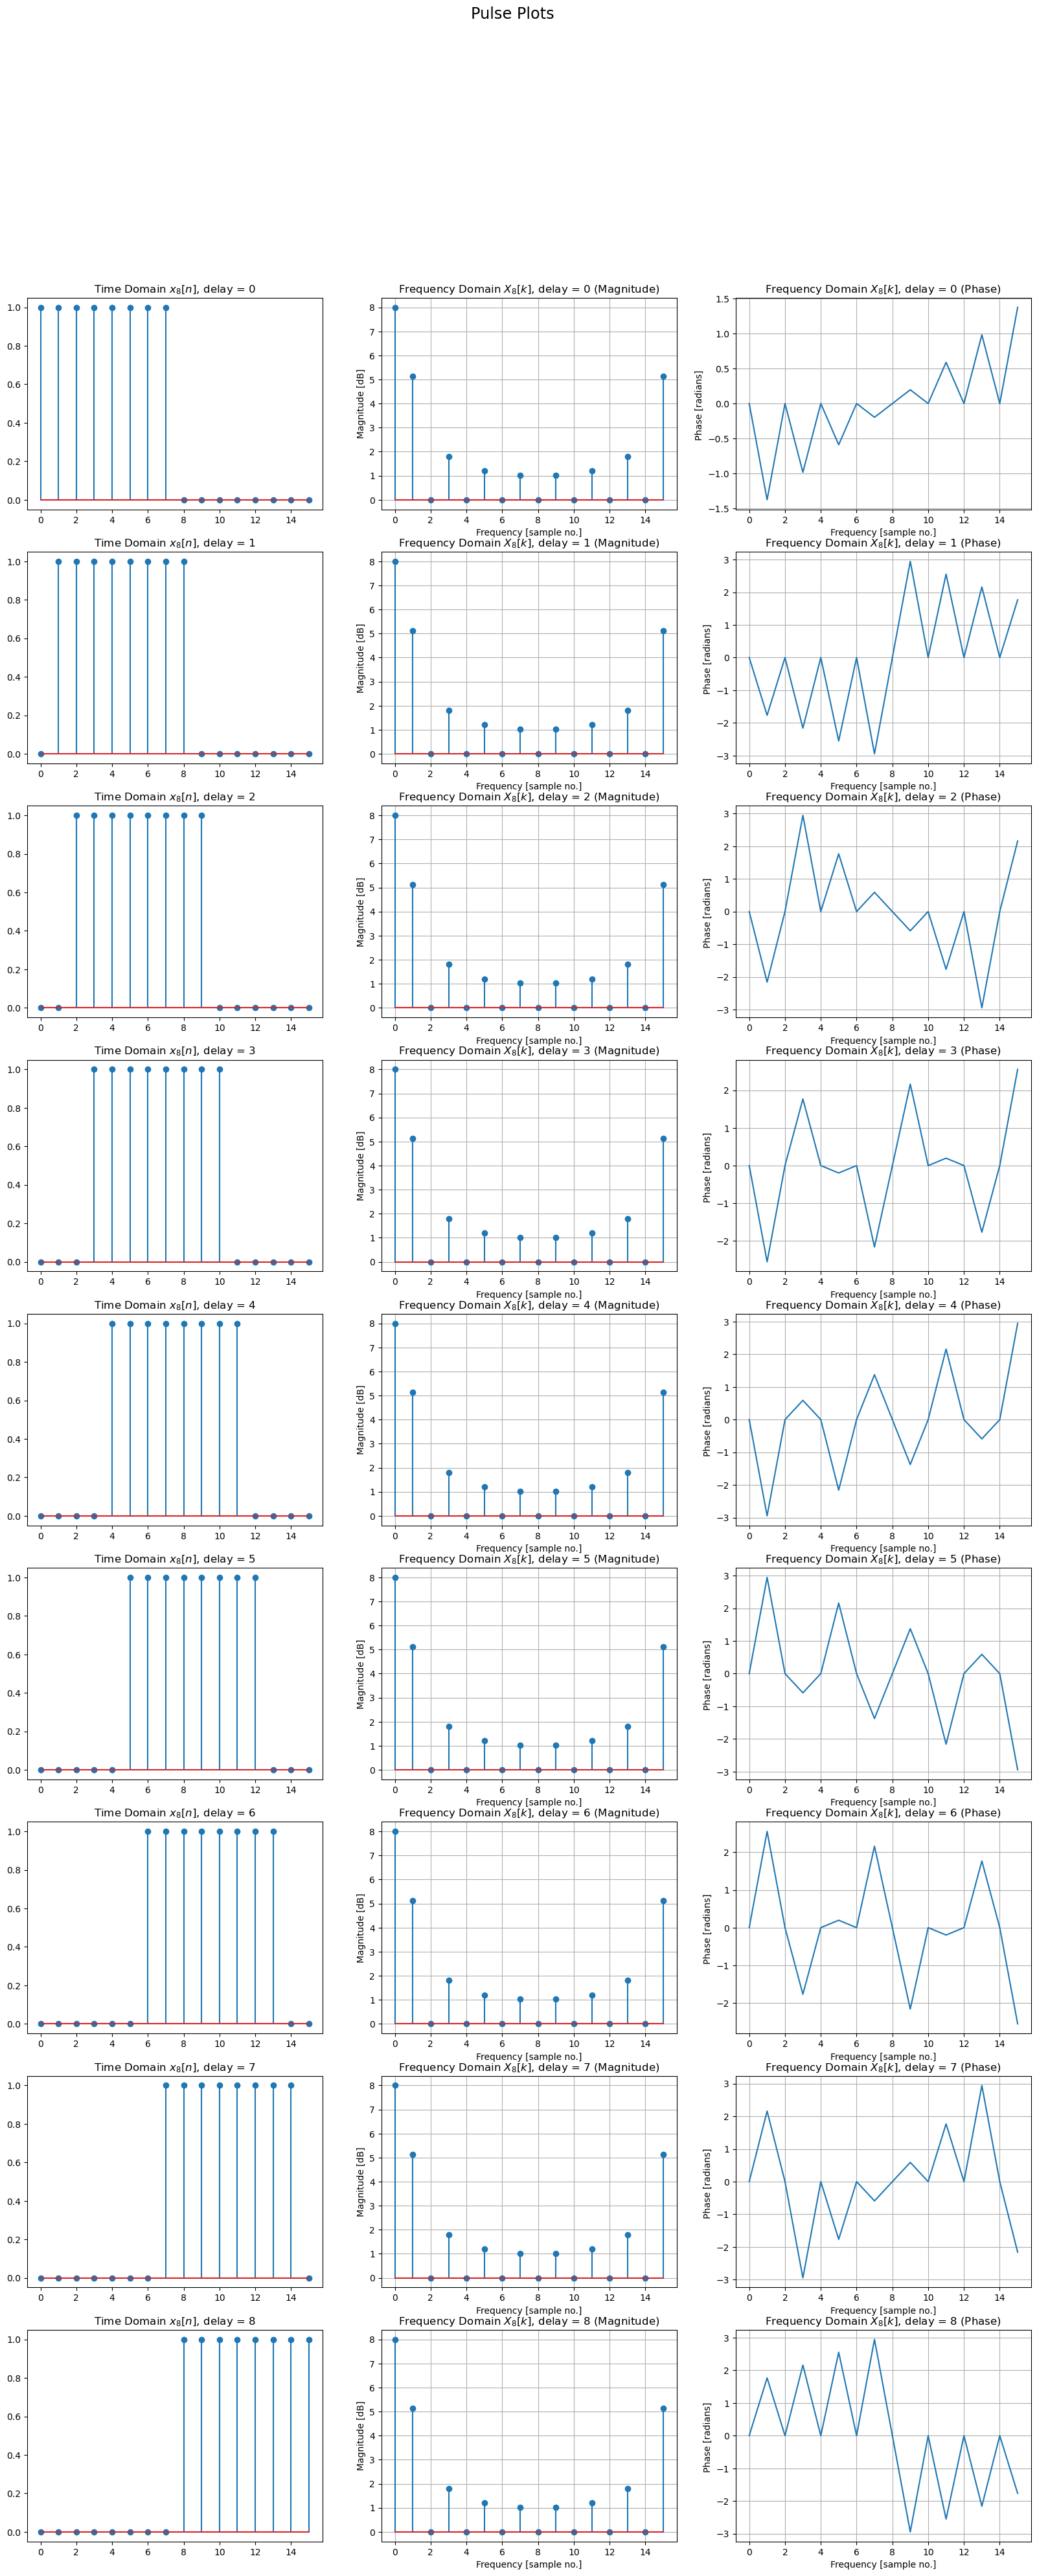

In [13]:
# Write the code here
arr = [0,1,2,3,4,5,6,7,8]
rows = len(arr)
cols = 3
freq = 8 

total_length = 16
fig, axs = plt.subplots(len(arr), 3, figsize=(20, 45))
fig.suptitle('Pulse Plots', fontsize='xx-large')
for i, delay in enumerate(arr):
    i *= 3
    timeD = np.concatenate(
        (np.zeros(delay), np.ones(freq), np.zeros(total_length-delay-freq)))
    freqD = fft(timeD)

    x = timeD
    title = f'Time Domain $x_{freq}[n]$, delay = {delay}'
    axs[i//cols, 0].stem(x)
    axs[i//cols, 0].set(title=title)

    x = freqD
    title = f'Frequency Domain $X_{freq}[k]$, delay = {delay}'
    mag = np.real(np.sqrt(x * np.conj(x)))
    phase = np.arctan2(np.imag(x), np.real(x))
    phase = np.unwrap(phase)

    mag_ylabel = 'Magnitude [dB]'
    xlabel = 'Frequency [Hz]'

    xlabel = 'Frequency [sample no.]'
    axs[i//cols, 1].stem(mag)
    axs[i//cols, 2].plot(phase)

    axs[i//cols, 1].set(xlabel=xlabel, ylabel=mag_ylabel,
                        title=title+" (Magnitude)")
    axs[i//cols, 2].set(xlabel=xlabel,
                        ylabel='Phase [radians] ', title=title+" (Phase)")
    axs[i//cols, 1].grid()
    axs[i//cols, 2].grid()


plt.show()


### Real World Example: ECG Signals

To test how much you have understood so far, you are given a real electrocardiogram (EGC) signal. The signal contains 500 data samples and sampled at a rate of 200 Hz. Our aim is to detect the heart rate of the patient from which this ECG was taken.

We first load the data into a vector using the Python command:

In [14]:
from functions.lab_functions import load

ecg = load('files/ecg.mat', 'ecg')

First, plot the ECG signal:

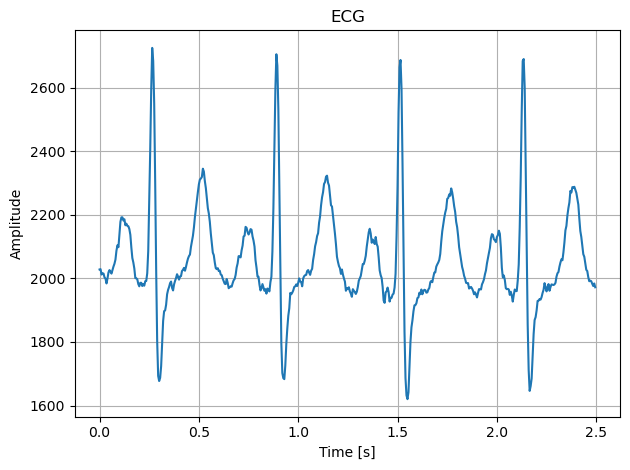

In [15]:
fsamp = 200;
Nsamp = len(ecg)
Tsamp = 1/fsamp
t = np.arange(0, Nsamp*Tsamp, Tsamp)
      
plt = plot_signal(t, ecg, title='ECG', xlabel='Time [s]', ylabel='Amplitude')
plt.show()

Now remove the DC component from the ECG signal by processing in the frequency-domain:

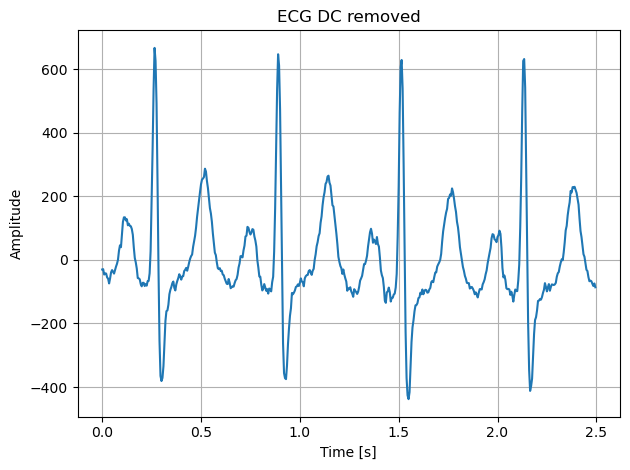

In [16]:
from scipy.fft import ifft

ECG = fft(ecg)
ECG[0] = 0 # remove the 0 Hz component 
ecg_no_dc = np.real(ifft(ECG))
plt = plot_signal(t, ecg_no_dc, title='ECG DC removed', xlabel='Time [s]', ylabel='Amplitude')
plt.show()


**Question 3.12**: Can you think of a way of removing the DC component in the time domain without using the DFT? Try implementing this time-domain approach in Python.

**Answer**: Two methods – either we subtract the mean of the signal, or we run the signal through a high-pass filter. Subtracting the mean is more accurate, however the signal must be zero-mean. The high pass filtered signal has some distortion towards the end, but can work with a non-zero mean signal.

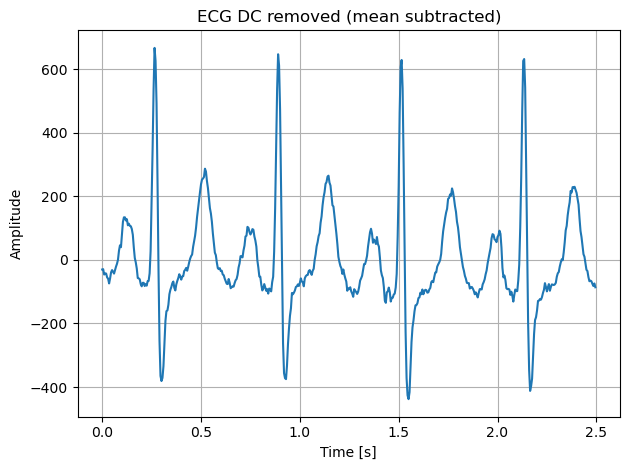

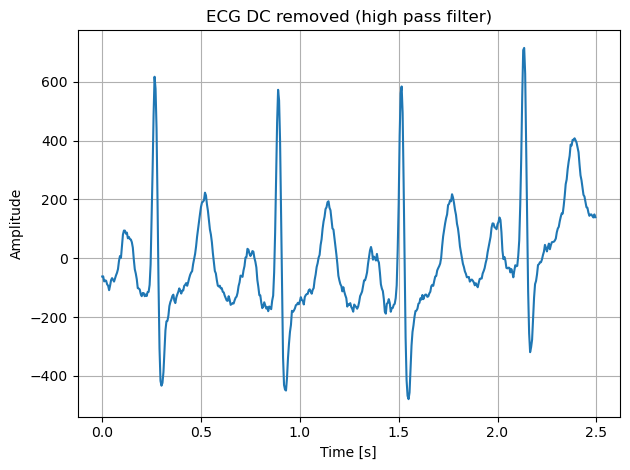

In [17]:
ecg_no_dc_mean = np.mean(ecg)
ecg_no_dc_2 = ecg - ecg_no_dc_mean
plt = plot_signal(t, ecg_no_dc_2, title='ECG DC removed (mean subtracted)',
                  xlabel='Time [s]', ylabel='Amplitude')
plt.show()


from scipy.signal import butter, filtfilt
# Define the filter parameters
fc = 5  # Cutoff frequency (Hz)
order = 4  # Filter order

# Design the filter coefficients using a Butterworth filter
b, a = butter(order, fc/(fs/2), btype='highpass')

# Apply the filter using filtfilt to avoid phase distortion
ecg_no_dc_3 = filtfilt(b, a, ecg)

plt = plot_signal(t, ecg_no_dc_3, title='ECG DC removed (high pass filter)',
                  xlabel='Time [s]', ylabel='Amplitude')
plt.show()


Let us plot the ECG signal with no DC offset:

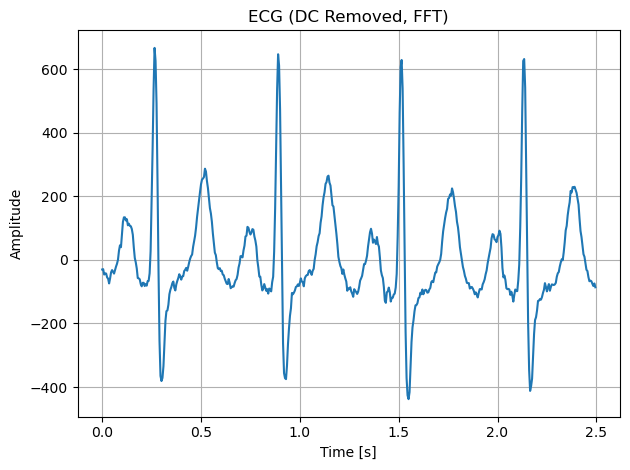

In [18]:
plt = plot_signal(t, ecg_no_dc, title='ECG (DC Removed, FFT)', xlabel='Time [s]', ylabel='Amplitude')
plt.show()

**Question 3.13**: Plot the spectra of the `ecg_no_dc` signal. Make sure that you can interpret the frequency axis. Deduce the the person's heart rate in beats per minute. Does this result make sense when compared to your plot of `ecg_no_dc` in the time domain?

>**GTA Tip**
> A normal resting heart rate for adults ranges from 50 to 100 beats per minute.

**Answer**: 50-100 bpm corresponds to 0.833-1.667 Hz. In the time domain we observe 4 peaks per 2.5 seconds which corresponds to 1.6 Hz, which is in range. 1.6Hz corresponds to 96 bpm.

If you look at the initial frequency plot, it is zoomed far out. Notice a constant increase until the 90Hz, then it drops off.

Later in the next plots, a function is used to find the peaks on a more accurate level. There the largest peaks are at 3.2Hz and 8Hz, which are multiples of 1.6Hz. There is also a decent peak at 1.6Hz, which is the correct heart rate, but the peak magnitude is less than the 3.2Hz and 8Hz dip.



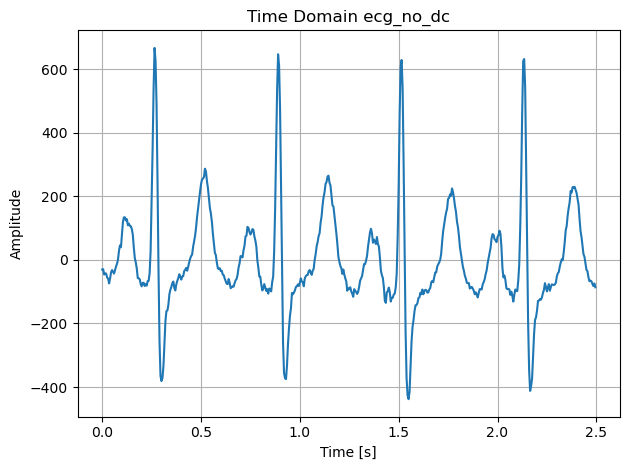

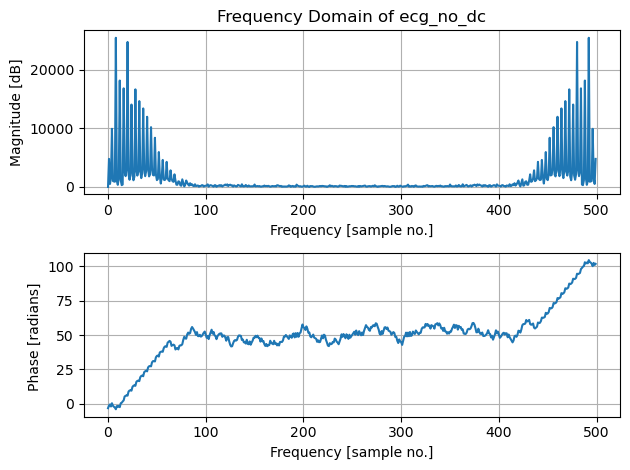

In [19]:
plt = plot_signal(t, ecg_no_dc, title='Time Domain ecg_no_dc',
                  xlabel='Time [s]', ylabel='Amplitude')
plt.show()

ecg_no_dc_fft = fft(ecg_no_dc)
plt = plot_spec(ecg_no_dc_fft, title='Frequency Domain of ecg_no_dc', )
plt.show()


Peaks: 
0.4 ,  4774.5
1.6 ,  9902.3
3.2 ,  25410.0
4.8 ,  18125.5
6.4 ,  16797.3
8.0 ,  24698.8
9.6 ,  14035.5
11.2 ,  16624.0
12.8 ,  14621.9
14.4 ,  13375.7
16.0 ,  11952.3
17.6 ,  10184.2
19.2 ,  8375.9


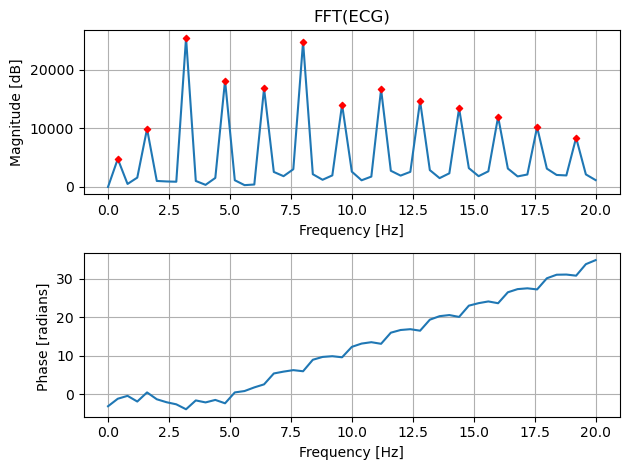

In [20]:
from functions.lab_functions import plot_spec_peaks

f_step = np.arange(0, fsamp, (fsamp/Nsamp))
y = fft(ecg_no_dc)

# Limit spectrum (zoom-in to the range)
f_max = 20 # Set the upper limit of the spectrum to 20 Hz
f_max_idx = np.argmax(f_step>f_max)
y = y[0:f_max_idx]
f_step = f_step[0:f_max_idx]

plt = plot_spec_peaks(f_step, y, title='FFT(ECG)')
plt.savefig('results/ex3/ex3_ecg.pdf')
plt.show()

>**GTA Tip**
>
>- The ECG signal is quasi-periodic and within each period, the heart cycles through both systole and diastole phases. In the frequency domain, you will not just see the heart rate, but also a series of successively higher frequencies called 'harmonic frequencies'. Therefore, to calculate the frequency of the heart, you first need to detect the multiple peaks generated in the frequency domain which will all be multiples of the fundamental frequency, $F_0$ (i.e. 1 $^\text{st}$ peak = $F_0$; 2 $^\text{nd}$ peak = $2\times F_0$;  3 $^\text{rd}$ peak = $3\times F_0$; and so on). 
>
>
>- Note that the whole ECG signal contains 4 cycles in total, thus leading to a peak at $F_0/4$ due to time-periodicity of the entire signal caused by sampling in the frequency domain.

The GTA tip makes sense as we can see major peaks following 1.6Hz from the waveform plot (manual calculation).

The peaks also follow in multiples of 1.6Hz. They peak at 3.2Hz and 8Hz the most, but this is because of the quasi-periodic nature of the signal.

This is also why we see a peak for 0.4Hz, 1/4 of the 1.6Hz, because the ECG signal contains 4 cycles in total.



# Optional Exercises - More Real-World Examples (20 mins)

### Unknown Signal
To test how much you have understood so far, you are given an unknown signal, `unknown.mat`. The file contains 1048 data samples. It is also known that the signal was sampled at 1 kHz and contains one or more significant sine waves.  

You can load the data into a vector using the Python command:

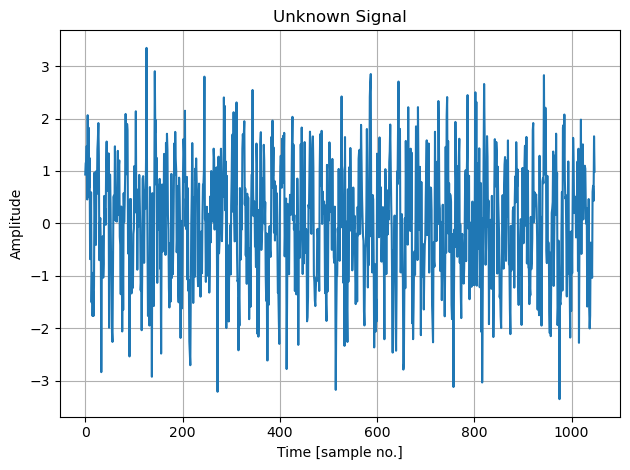

In [21]:
from functions.lab_functions import load
import IPython.display as ipd

unknown = load('files/unknown.mat', 'unknown')

plot_signal(unknown, title='Unknown Signal', xlabel='Time [sample no.]', ylabel='Amplitude')
plt.show()

**Question 3.14**: Take at least two different segments. Each segment contains 256 samples of data, starting at different chosen starting sample indices, and compare their spectra. Are they essentially the same? Make sure that you can interpret the frequency axis. Deduce the frequency and magnitude of its constituent sine waves. 

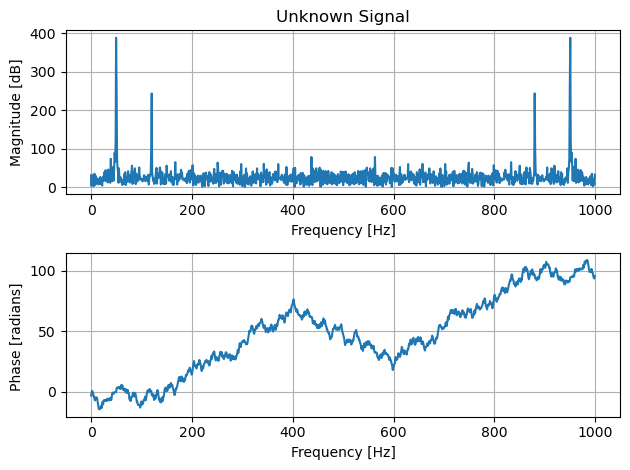

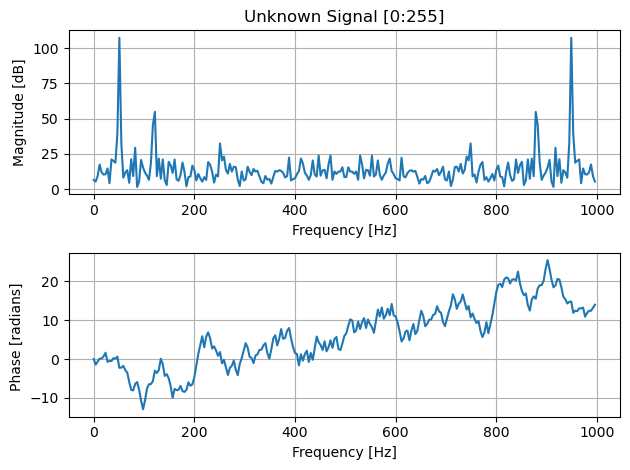

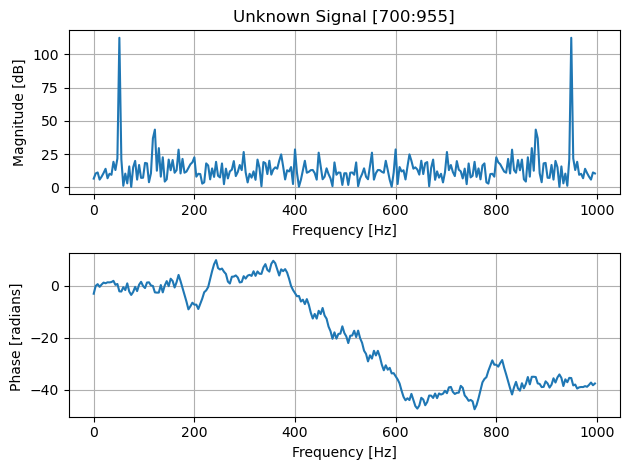

In [22]:
# Write the code here 

slice1 = unknown[0:255]
slice2 = unknown[700:955]

fsamp = 1000
Nsamp = 1048
f_step = np.arange(0, fsamp, (fsamp/Nsamp))


plot_spec(f_step, fft(unknown), title='Unknown Signal')
plt.show()

fsamp = 1000
Nsamp = 255
f_step = np.arange(0, fsamp, (fsamp/Nsamp))

plot_spec(f_step, fft(slice1), title='Unknown Signal [0:255]')
plt.show()

plot_spec(f_step, fft(slice2), title='Unknown Signal [700:955]')
plt.show()

Note peaks at somewhere around 40-60Hz. Let's zoom in further:



Peaks: 
11.8 ,  17.4
27.5 ,  14.6
35.3 ,  21.0
51.0 ,  107.4
66.7 ,  13.4
74.5 ,  21.2
82.4 ,  29.3
94.1 ,  20.7
121.6 ,  54.8
129.4 ,  21.6
137.3 ,  21.1
149.0 ,  19.3
160.8 ,  21.0
176.5 ,  18.8
196.1 ,  16.6


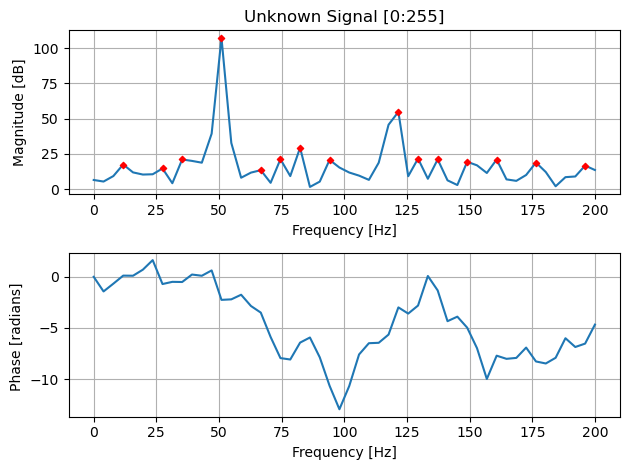

In [23]:
fsamp = 1000
Nsamp = 255
f_step = np.arange(0, fsamp, (fsamp/Nsamp))
y = fft(slice1)

# Limit spectrum (zoom-in to the range)
f_max = 200  # Set the upper limit of the spectrum to 200 Hz
f_max_idx = np.argmax(f_step > f_max)
y = y[0:f_max_idx]
f_step = f_step[0:f_max_idx]

plt = plot_spec_peaks(f_step, y, title='Unknown Signal [0:255]')
plt.show()


Peaks: 
23.5 ,  14.0
39.2 ,  19.3
51.0 ,  112.4
62.7 ,  10.4
70.6 ,  15.8
82.4 ,  19.9
90.2 ,  16.9
121.6 ,  43.4
129.4 ,  29.5
137.3 ,  22.7
149.0 ,  20.9
156.9 ,  20.6
168.6 ,  28.4
176.5 ,  21.4


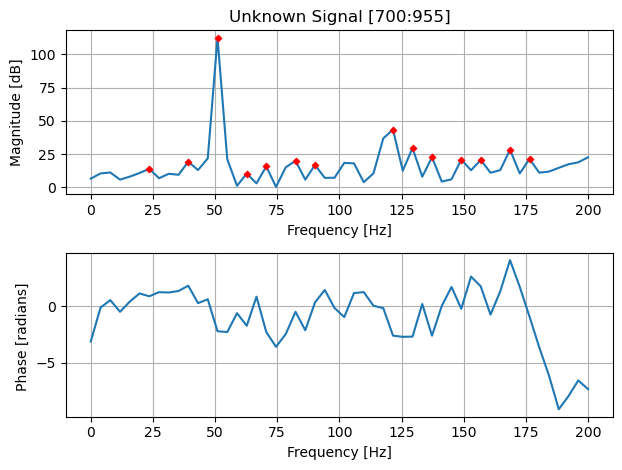

In [24]:
fsamp = 1000
nsamp = 255
f_step = np.arange(0, fsamp, (fsamp/Nsamp))
y = fft(slice2)

# Limit spectrum (zoom-in to the range)
f_max = 200  # Set the upper limit of the spectrum to 200 Hz
f_max_idx = np.argmax(f_step > f_max)
y = y[0:f_max_idx]
f_step = f_step[0:f_max_idx]

plt = plot_spec_peaks(f_step, y, title='Unknown Signal [700:955]')
plt.show()


In both samples, we see a major peak at 51.0Hz with magnitude of 107-112. There are also peaks at 121.6Hz with around half the magnitude.  The spectra is symmetrical so there is a peak at (1000-51) = 949Hz around 100-120Hz, and a peak with half the magnitude at (1000-121.6) = 878.4Hz.

The above frequencies suggest that there are sinusodial components at these requencies.

The majority of other small peaks or jaggedness detected are likely noise from sampling. They are unlikely to be harmonics as they are not spaced apart by the fundamental frequency.

Spectral leakage can occur when the signal contains frequency components that are not integer multiples of the FFT bin spacing, which can cause the energy to spread across multiple frequency bins and produce jaggedness in the spectrum.

Additional analysis e.g. time-domain analysis, filtering, or wavelet analysis is needed to more accurately isolate and characterise the components.

### Piano Example
Now let us see how windowing is used in a real world example. Have a listen to the `piano.wav` file. It is a 6 second long recording that contains 3 notes played at 2 second intervals on a grand piano. 
*(The first note is played at 0~seconds then the second note is played starting at 2 seconds and the third note is played starting at 4 seconds.)*

<audio controls src="files/piano.wav"> 
</audio>

We are now going to do the job of an electronic tuning device by using windows and the frequency domain to workout which notes are being played.

First, we need to read this '.wav' file in the following way: 

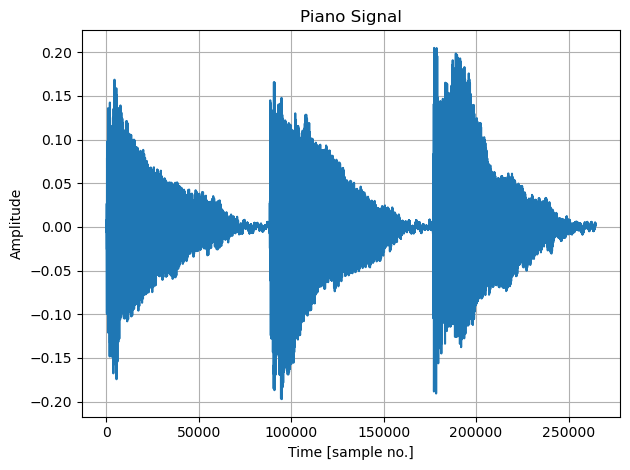

In [28]:
import soundfile as sf
data, fsamp = sf.read('files/piano.wav') 
Tsamp = 1/fsamp

plot_signal(data, title='Piano Signal', xlabel='Time [sample no.]', ylabel='Amplitude')
plt.show()

To investigate the second note that was played 2.5 seconds after the start of the recording, we apply a window with the following parameters: 

```python
win_loc_sec = 2.5 # 2.5 seconds into second note
win_size_sec = 0.200  # 200 ms frame
```

We can now extract and plot this windowed data in both time- and frequency-domain using the following function:

In [26]:
from functions.lab_functions import plot_spec_peaks

def plot_piano_note(win_loc_sec, win_size_sec):

    win_loc = int(win_loc_sec/Tsamp)
    win_size = int(win_size_sec/Tsamp)

    x = data[win_loc:win_loc+win_size-1]

    Nsamp = len(x);
    t = np.arange(0, Nsamp*Tsamp, Tsamp)

    # Plot signal (frame)
    title = 'Piano Signal - '+str(win_loc_sec)+'s'
    plot_signal(t, x, title=title, xlabel='Time [s]', ylabel='Amplitude')    
    plt.show()

    X = fft(x);
    f_step = np.arange(0, fsamp, fsamp/Nsamp)

    # Limit spectrum
    f_max = 1000 # Set the upper limit of the spectrum to 20Hz
    f_max_idx = np.argmax(f_step>f_max)
    X = X[0:f_max_idx]
    f_step = f_step[0:f_max_idx]

    # Plot spectrum
    title = 'FFT(Piano Signal) - '+str(win_loc_sec)+'s'
    plot_spec_peaks(f_step, X, title=title)
    plt.savefig('results/ex3/ex3_fft_piano_'+str(win_loc_sec)+'_s.pdf')
    plt.show()

We can now run this fuction to see the plots:

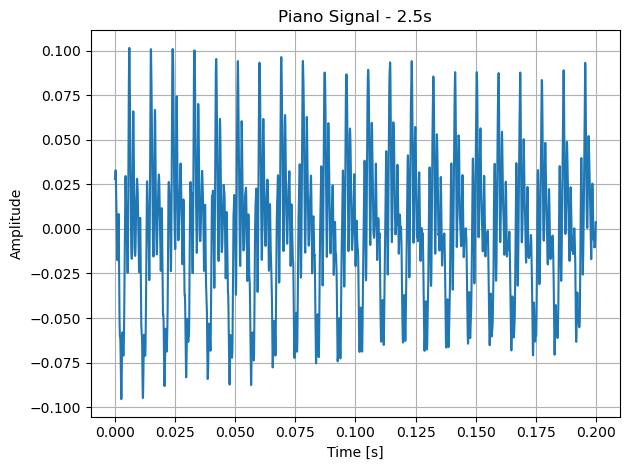

Peaks: 
5.0 ,  10.1
25.0 ,  15.0
110.0 ,  172.6
220.0 ,  74.7
330.0 ,  15.0
445.1 ,  35.1
555.1 ,  69.8
665.1 ,  112.2
775.1 ,  7.7


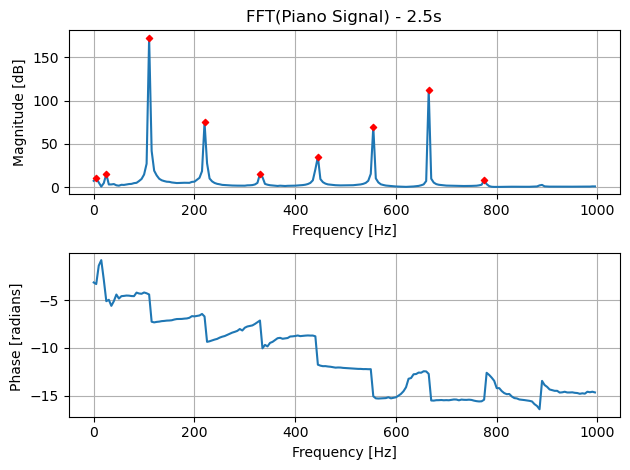

In [27]:
win_loc_sec = 2.5 # 2.5 seconds into second note
win_size_sec = 0.200  # 200 ms frame
plot_piano_note(win_loc_sec, win_size_sec)

**Question 3.15** Analysing the windowed data for the second note, find the frequency of the signal and deduce the musical note being played. For the musical notes, use scientific pitch notation as tabulated here: <https://en.wikipedia.org/wiki/Piano_key_frequencies>.

**Answer**: Highest peak is at 110Hz, notice that other peaks go up in increments of 110Hz. There is a slight large jump at 445.1, 555.1, 665.1, 775.1, but the increments are the same. Note is A2.



>**GTA Tip**
>
>Recall what we learned about harmonics from the ECG example in Exercise 3. 

**Question 3.16**  See if you can work out the other 2 notes that were played.

>**Hint**: use `winlocsec  = 0.5` (0.5  seconds into the 1 $\text{st}$ note), `winlocsec  = 2.5` (0.5  seconds  into the 2 $\text{nd}$ note) and `winlocsec  = 4.5` (0.5  seconds  into the 3 $\text{rd}$ note) 


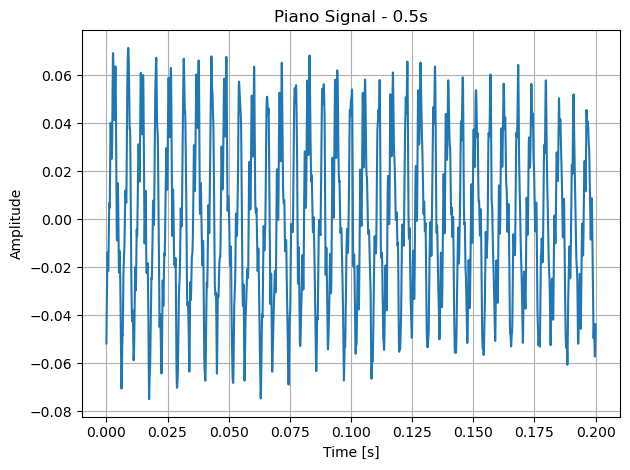

Peaks: 
25.0 ,  13.6
50.0 ,  2.6
90.0 ,  31.2
175.0 ,  184.8
265.0 ,  44.6
350.0 ,  18.0
440.0 ,  23.8
530.1 ,  22.7
615.1 ,  17.3
705.1 ,  3.8
790.1 ,  6.2
880.1 ,  19.4
970.1 ,  34.7


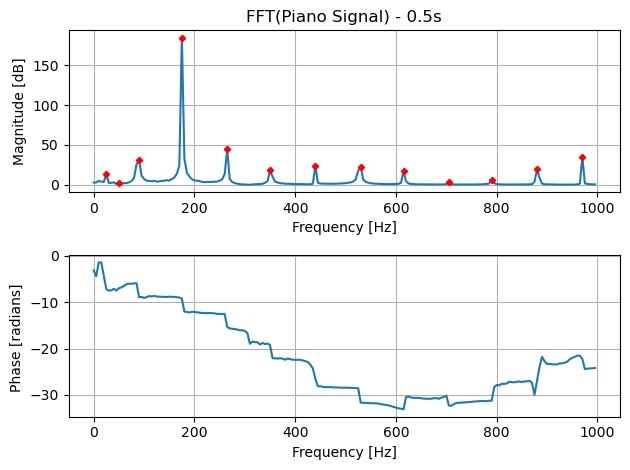

In [29]:
win_loc_sec = 0.5 # 0.5 seconds into first note
win_size_sec = 0.200  # 200 ms frame
plot_piano_note(win_loc_sec, win_size_sec)

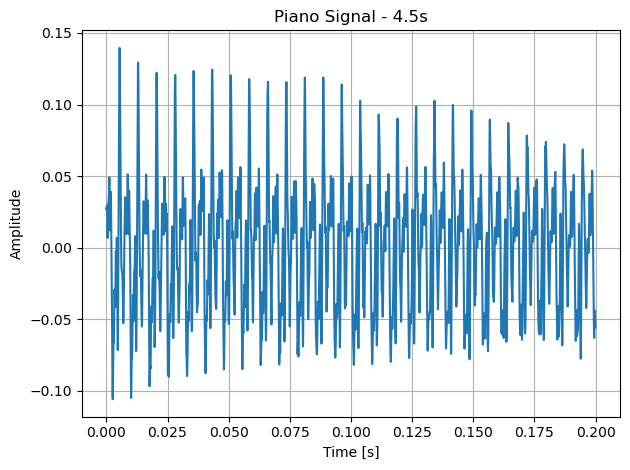

Peaks: 
10.0 ,  11.6
25.0 ,  8.4
130.0 ,  85.8
265.0 ,  156.7
395.0 ,  70.4
530.1 ,  101.1
660.1 ,  36.4
795.1 ,  37.3
925.1 ,  80.5


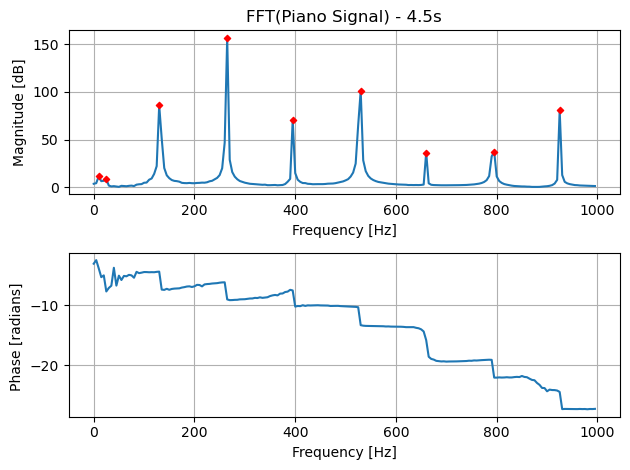

In [30]:
win_loc_sec = 4.5 # 4.5 seconds into third note
win_size_sec = 0.200  # 200 ms frame
plot_piano_note(win_loc_sec, win_size_sec)

First note is 90Hz, which about F2 (actually 87.3Hz).
Second note is 110Hz, which is A2.
Third note is close to 130Hz, which is C3 (actually 130.8Hz).

(I have perfect pitch and can verify that the notes are correct.)
